In [ ]:
# import modules
import cv2
import numpy as np
from matplotlib import pyplot as plt
import operator
from google.colab.patches import cv2_imshow
import pandas as pd

In [ ]:
# mount drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# image path
img_path = '/content/drive/My Drive/Fruits_Color_Extraction/fruits-data/train/Apple Braeburn/100_100.jpg'

brown pixel percentage: 45.41 %


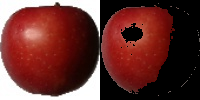

In [ ]:
# read image 
img = cv2.imread(img_path)

red = [650, 50, 50]  # RGB, experiment with these values 
diff = 50
boundaries = [([red[2]-diff, red[1]-diff, red[0]-diff],
               [red[2]+diff, red[1]+diff, red[0]+diff])]
# in order BGR as opencv represents images as numpy arrays in reverse order

for (lower, upper) in boundaries:
    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)
    mask = cv2.inRange(img, lower, upper)
    output = cv2.bitwise_and(img, img, mask=mask)

    ratio_brown = cv2.countNonZero(mask)/(img.size/3)
    print('red pixel percentage:', np.round(ratio_brown*100, 2),'%')

    cv2_imshow(np.hstack([img, output]))
    cv2.waitKey(0)

**Other image**

In [ ]:
# image path
img_path1 = '/content/drive/My Drive/Fruits_Color_Extraction/fruits-data/test/Tomato 1/9_100.jpg'

red pixel percentage: 37.34 %


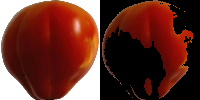

In [ ]:
# read image 
img = cv2.imread(img_path1)

red = [650, 50, 50]  # RGB,
diff = 50
boundaries = [([red[2]-diff, red[1]-diff, red[0]-diff],
               [red[2]+diff, red[1]+diff, red[0]+diff])]
# in order BGR as opencv represents images as numpy arrays in reverse order

for (lower, upper) in boundaries:
    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)
    mask = cv2.inRange(img, lower, upper)
    output = cv2.bitwise_and(img, img, mask=mask)

    ratio_brown = cv2.countNonZero(mask)/(img.size/3)
    print('red pixel percentage:', np.round(ratio_brown*100, 2),'%')

    cv2_imshow(np.hstack([img, output]))
    cv2.waitKey(0)

In [ ]:
#Red: (255, 0, 0), Green: (0, 255, 0), Blue: (0, 0, 255), Yellow: (255, 255, 0), 
#Brown: (165, 42, 42), Orange: (255, 165, 0),Black: (0, 0, 0), White: (255, 255, 255)

In [ ]:
## load model
import pickle
pickle_in = TypeError: imshow() missing required argument 'mat' (pos 2)
open("/content/drive/My Drive/Fruits_Color_Extraction/fruit_model.pickle","rb")
model = pickle.load(pickle_in)

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image as keras_image # for loading, convert image to array
from keras.applications.vgg16 import preprocess_input

In [ ]:
# load weights of pretrained model
resnet = ResNet50(weights='imagenet', include_top=False)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step


In [ ]:
## helper function to extract features
def extract_features(path_img):
  img = keras_image.load_img(path_img, target_size=(224, 224))
  img_to_data = keras_image.img_to_array(img)
  img_to_data = np.expand_dims(img_to_data, axis=0)
  img_to_data = preprocess_input(img_to_data)
  features = resnet.predict(img_to_data)
  return features

In [ ]:
# image path
test_dir_path = '/content/drive/My Drive/Fruits_Color_Extraction/fruits-data/test/Tomato 1/9_100.jpg'

In [ ]:
# extract features using above dataframe
test_features_df = pd.DataFrame()
temp = [] # for flatten features
temp_features = extract_features(test_dir_path)
temp.append(temp_features.flatten())
temp_df = pd.DataFrame(temp)

In [ ]:
temp_df.shape

(1, 100352)

In [ ]:
model.predict(temp_df)

array(['tomato'], dtype='<U6')

In [ ]:
pip show keras

Name: Keras
Version: 2.3.1
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: pyyaml, h5py, keras-preprocessing, scipy, six, keras-applications, numpy
Required-by: textgenrnn, keras-vis, kapre, fancyimpute
